In [1]:
import pathlib
import requests
from black.trans import defaultdict

year = 2024
day = 14

url = f"https://adventofcode.com/{year}/day/{day}/input"

with open("cookie.txt", "r") as file:
    session = file.read()

headers = {"cookie": f"session={session}"}

pathlib.Path("inputs").mkdir(parents=True, exist_ok=True)

with open(f"inputs/day_{str(day).zfill(2)}_input.txt", "wb") as file:
    file.write(requests.get(url, headers=headers).content)

In [2]:
lines = [x for x in open(f"inputs/day_{str(day).zfill(2)}_input.txt", "r")]
aoc = "".join(lines)
G = [[x for x in line.strip()] for line in lines]
R = len(G)
C = len(G[0])

print(lines[:5])
print(R, C)

['p=62,65 v=-96,-93\n', 'p=50,44 v=72,74\n', 'p=33,42 v=-6,-83\n', 'p=68,100 v=36,21\n', 'p=45,36 v=3,-44\n']
500 17


In [3]:
import re

test = """p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3"""

test_lines = test.split("\n")

X = 101
Y = 103

robots = []
pattern = r"p=(\d+),(\d+) v=([-]*\d+),([-]*\d+)"
for line in lines:

    matches = re.match(pattern, line)
    robot = matches.groups()
    robots.append([int(x) for x in robot])

for i in range(100):
    for robot in robots:
        robot[0] = (robot[0] + robot[2]) % X
        robot[1] = (robot[1] + robot[3]) % Y

from collections import defaultdict

locs = defaultdict(int)
quads = defaultdict(int)

for robot in robots:
    locs[(robot[0], robot[1])] += 1
    if robot[0] < X // 2 and robot[1] < Y // 2:
        quads[0] += 1
    elif robot[0] > X // 2 and robot[1] > Y // 2:
        quads[3] += 1
    elif robot[0] > X // 2 and robot[1] < Y // 2:
        quads[1] += 1
    elif robot[0] < X // 2 and robot[1] > Y // 2:
        quads[2] += 1
    else:
        assert robot[0] == X // 2 or robot[1] == Y // 2

print(quads[0] * quads[1] * quads[2] * quads[3])

221616000


In [4]:
import re
from copy import deepcopy

test = """p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3"""

test_lines = test.split("\n")

X = 101
Y = 103

robots = []
pattern = r"p=(\d+),(\d+) v=([-]*\d+),([-]*\d+)"
for line in lines:

    matches = re.match(pattern, line)
    robot = matches.groups()
    robots.append([int(x) for x in robot])

start_robots = deepcopy(robots)

loop! 10403 0
lots on same line 7571


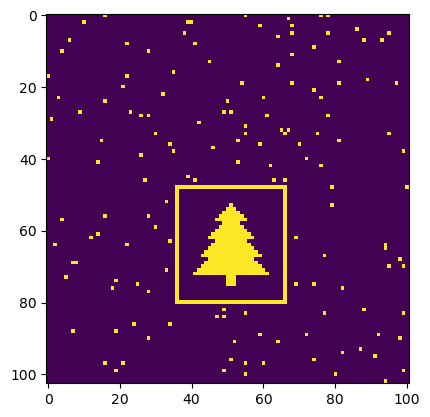

In [6]:
from copy import deepcopy

robots = deepcopy(start_robots)

import numpy as np
from matplotlib import pyplot as plt


# "very rarely" and "fewest seconds" imply a loop. Work out the loop.

states = []
loop_counter = 0

for i in range(100000):
    locs = defaultdict(int)
    for robot in robots:
        robot[0] = (robot[0] + robot[2]) % X
        robot[1] = (robot[1] + robot[3]) % Y
        locs[(robot[0], robot[1], robot[2], robot[3])] += 1

    if locs in states:
        loop_counter = i
        print("loop!", i, states.index(locs))
        break
    else:
        states.append(locs)


for i in range(loop_counter):
    x_counts = defaultdict(int)
    y_counts = defaultdict(int)

    for robot in robots:
        robot[0] = (robot[0] + robot[2]) % X
        robot[1] = (robot[1] + robot[3]) % Y

        x_counts[robot[0]] += 1
        y_counts[robot[1]] += 1

    # Determine that it should have some lines.
    if max(y_counts.values()) > 16 and max(x_counts.values()) > 16:
        # off by 1 because we're counting seconds.
        print("lots on same lines", i + 1)
        arr = np.zeros((Y, X))
        for robot in robots:
            arr[robot[1]][robot[0]] = 1
        plt.imshow(arr)
        plt.show()